# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

In [1]:
#Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando o Dataframe
prev_ren = pd.read_csv('previsao_de_renda.csv')

In [3]:
prev_ren.head(7)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
5,5,2015-01-01,7409,M,False,True,0,Assalariado,Superior incompleto,Casado,Casa,46,15.561644,2.0,False,5483.58
6,6,2015-01-01,6913,F,False,True,0,Assalariado,Secundário,Casado,Casa,51,5.046575,2.0,False,1947.99


1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [4]:
#Selecionando colunas numéricas
prev_ren = prev_ren.select_dtypes(include=['number'])

#Imprimindo colunas
prev_ren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   index                  15000 non-null  int64  
 2   qtd_filhos             15000 non-null  int64  
 3   idade                  15000 non-null  int64  
 4   tempo_emprego          12466 non-null  float64
 5   qt_pessoas_residencia  15000 non-null  float64
 6   renda                  15000 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 820.4 KB


In [5]:
prev_ren.nunique()

Unnamed: 0               15000
index                     9837
qtd_filhos                   8
idade                       47
tempo_emprego             2571
qt_pessoas_residencia        9
renda                     9759
dtype: int64

In [7]:
#Selecionar colunas
prev_ren = prev_ren[['index', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]

#Croiar matriz de correlação
prev_ren.corr()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,1.000000,0.039734,-0.047971,-0.034574,0.041818,-0.001740
qtd_filhos,0.039734,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.047971,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.034574,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.041818,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,-0.001740,0.009567,0.042570,0.394235,0.020977,1.000000


A maior correlação de entre variáveis percebida pela matriz criada é entre o número de filhos e o número de pessoas na residência.

Classificando a correlação das outras variáveis com renda de forma decrescente temos:

            * tempo_emprego
            * idade
            * qt_pessoas_residencia
            * qtd_filhos
            * index

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

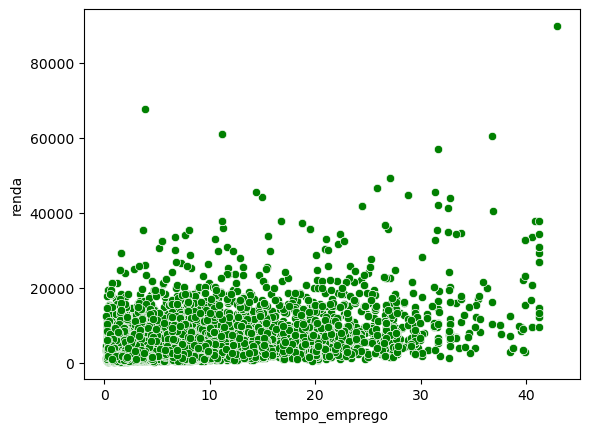

In [15]:
#Criando o gráfico com as variáveis renda, tempo_emprego e idade

graf_prev = prev_ren[['renda', 'tempo_emprego', 'idade']]
sns.scatterplot(data=graf_prev, x='tempo_emprego', y = 'renda', color = 'green')

<Axes: xlabel='idade', ylabel='renda'>

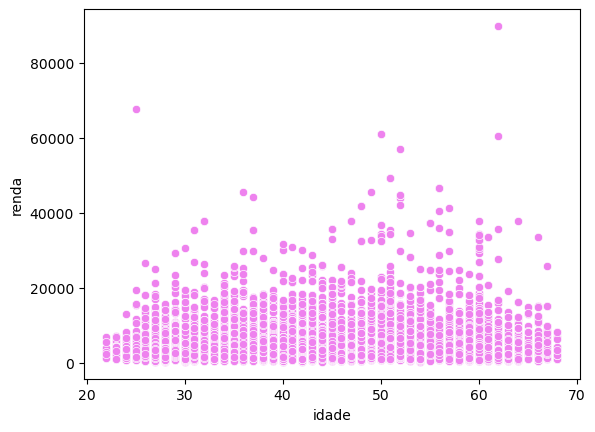

In [19]:
sns.scatterplot(data=graf_prev, x='idade', y = 'renda', color='violet')

3) Na sua opinião, há outliers na variável renda?

Sim, há casos de valores de renda muito mais altos que os valores da moda para ambos as variáveis estudadas. 

Para o estudo de idade há casos de outliers mais perceptíveis em um caso de, aproximadamente, 24, 50 e 61 anos de idade. Já no estudo do tempo de emprego os casos perceptíveis são com 5, 10, 30 e 40 anos de emprego.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [21]:
#Calculando o logaritmo da variável 'renda'

prev_ren['log_renda'] = np.log(prev_ren['renda'])

<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

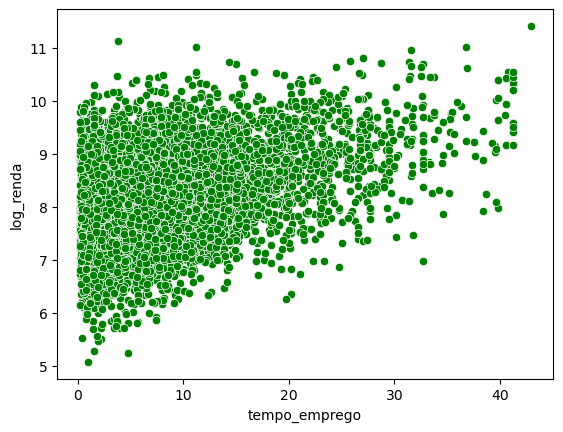

In [23]:
#Repetindo a sequencia de análise:

#Selecionando variáveis
graf_prev = prev_ren[['log_renda', 'tempo_emprego', 'idade']]

sns.scatterplot(data=graf_prev, x='tempo_emprego', y = 'log_renda', color = 'green')

<Axes: xlabel='idade', ylabel='log_renda'>

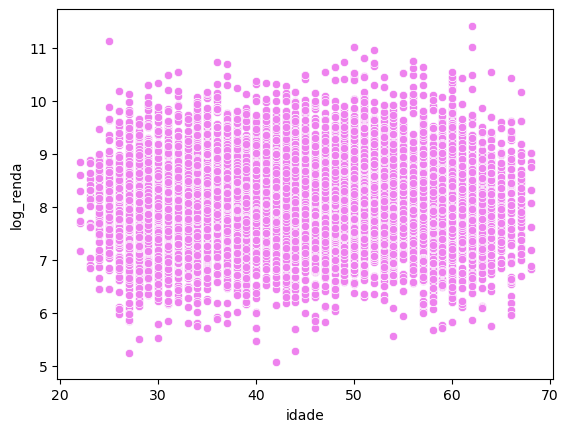

In [24]:
sns.scatterplot(data=graf_prev, x='idade', y = 'log_renda', color = 'violet')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do LOG mostra uma melhora na análise, uma vez que mostra uma melhor relação de crescimento e constância nos dados apresentados.